In [1]:
%matplotlib inline
from ipywidgets import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib.lines import Line2D
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

In [2]:
def describe(data):
    df = pd.DataFrame(data)
    print(df.describe())

def histogram(data, a=1, b=0):
    data = data*a+b
    plt.hist(x=data, bins='auto', color='#521422', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('X')
    plt.ylabel('Liczność')
    describe(data)
    plt.xlim(xmin=-13,xmax=13)
    
def normal_dist():
    x = np.linspace(-3, 3, 100)
    plt.plot(x, stats.norm.pdf(x, 0, 1))
    plt.grid()
    
def skewness(a=0):
    data = (stats.skewnorm(a).rvs(1000)*10).astype(int)
    
    _, _, patches = plt.hist(x=data, bins='auto', color='#521422', alpha=0.7, rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('X')
    plt.ylabel('Liczność')
    
    stat = [np.mean(data), np.median(data), stats.mode(data)[0][0]]
    cols = ['r', 'g', 'b']
    lines = [Line2D([0], [0], color=c, lw=4) for c in cols]
    
    for col, st in zip(cols, stat):
        for i, patch in enumerate(patches):
            if st < patch.get_x():
                patches[i-1].set_color(col)
                break
            if i == len(patches)-1:
                patches[i].set_color(col)
     
    plt.suptitle("Skośność="+str(round(stats.skew(data),3)))
    plt.legend(lines,[txt +'='+str(stat[i]) for i, txt in enumerate(['Średnia', 'Mediana', 'Dominanta'])]) 

# Statystyka opisowa

![histogramy](https://www.cs.put.poznan.pl/amensfelt/pub/pics/hists.png)

![weurl](https://assets.weforum.org/editor/F9EqAhZ_XqicwLxiJpPB4sLnnlbbAtrlnnnGWtARM1w.gif "spread")

[Źródło](https://www.weforum.org/agenda/2020/03/coronavirus-control-measures)

### Przykład - wyniki maratonu

![histogramy](https://www.cs.put.poznan.pl/amensfelt/pub/pics/marathon_total.png)

[Źródło](https://enduhub.com/pl/wyniki/2017/10/15/bieganie/18-pko-poznan-maraton,33686/)

### Przykład - wyniki maratonu 2

![histogramy](https://www.cs.put.poznan.pl/amensfelt/pub/pics/marathon_km.png)

## Miary rozkładu

\begin{itemize}
	\item Miary położenia
	\item Miary rozproszenia
	\item Miary asymetrii i koncentracji 
\end{itemize}

### Dominanta

Dominantą nazywamy najczęściej występującą wartość w próbce.

### Mediana

$n$ - liczba obserwacji
\vspace{0.5cm}
\begin{itemize}
	\item $n$ nieparzyste
	$$\textrm{Mediana} = x_{(n+1)/2}$$
	\vspace{0.25cm}
	\item $n$ parzyste
	$$\textrm{Mediana} = \frac{x_{n/2}+x_{n/2+1}}{2}$$
\end{itemize}

### Inne kwantyle

\begin{itemize}
	\item Percentyle
	\item Decyle
	\item Kwartyle
	\item ...
\end{itemize}
$$Poz_p = (n+1)p$$

![siatka](http://bi.gazeta.pl/im/8/1326/m1326948.jpg)

[Źródło](http://bi.gazeta.pl/im/8/1326/m1326948.jpg)

### Średnia arytmetyczna

\begin{itemize}
	\item w populacji:
	$$\mu = \frac{1}{n} \sum_{i=1}^{n}x_i$$

   \item w próbce:
	$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i$$
\end{itemize}

![średnia](http://www.texample.net/media/tikz/examples/PNG/balance.png)

[Źródło](http://www.texample.net/media/tikz/examples/PNG/balance.png)

### Inne średnie

\begin{itemize}
	\item Średnia geometryczna
		$$\bar{x}_g = {\displaystyle \left(\prod _{i=1}^{n}x_{i}\right)^{\frac {1}{n}}={\sqrt[{n}]{x_{1}x_{2}\cdots x_{n}}}}$$
        
\item Średnia harmoniczna
			$$\bar{x}_h=\frac{n}{\sum\limits_{i=1}^{n}\frac{1}{x_i}} ~~~~~~~~~~~~~ \bar{x}_{wh}=\frac{\sum\limits_{i=1}^{n}w_i}{\sum\limits_{i=1}^{n}\frac{w_i}{x_i}}$$
            
\item Średnia ucinana
			$$\bar{x}_{t} = \frac{1}{n-2k}\sum_{i=k+1}^{n-k}x_i$$
	\end{itemize}

### Przykład - wynagrodzenia

![wynagrodzenia](https://www.cs.put.poznan.pl/amensfelt/pub/pics/salary.png)

[Źródło](https://stat.gov.pl)

### Skale pomiarowe

|		            | Dominanta | Mediana | Średnia |
|---|---|---|---|
|Nominalne           |        |           |         |
|Porządkowe           |       |           |         |
|Interwałowe/Ilorazowe |      |           |         |

## Miary rozproszenia

\begin{itemize}
	\item ? 
	$$\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})$$
    
\item Odchylenie przeciętne
	$$D = \frac{1}{n}\sum_{i=1}^{n}|(x_i-\bar{x})|$$
\end{itemize}

### Wariancja i odchylenie standardowe

\begin{itemize}
	\item Wariancja w populacji
	$$\sigma^2=\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2$$
    
\item Wariancja w próbce
	$$s^2=\frac{1}{\boldsymbol{n}-\boldsymbol{1}}\sum_{i=1}^{n}(x_i-\bar{x})^2$$
    
\item Odchylenie standardowe
	$$s=\sqrt{s^2}$$
\end{itemize}

### Inne miary rozproszenia

\begin{itemize}
		\item Rozstęp 
			$$R = x_{max}-x_{min}$$
            
\item Rozstęp międzykwartylowy 
			$$IQR = Q_3-Q_1$$
            
\item Współczynnik zmienności 
			$$V = \frac{s}{\bar{x}}$$
\end{itemize}

In [3]:
data = np.random.normal(loc=1, scale=1, size=1000)    
describe(data)

                 0
count  1000.000000
mean      1.033392
std       0.998886
min      -2.928110
25%       0.358840
50%       1.029475
75%       1.699662
max       3.705007


In [4]:
interact(histogram, data=fixed(data), a=(-3,3,1), b=(-10,10,1))

interactive(children=(IntSlider(value=1, description='a', max=3, min=-3), IntSlider(value=0, description='b', …

<function __main__.histogram(data, a=1, b=0)>

### Wykres pudełkowy (boxplot)

![boxplot](https://www.cs.put.poznan.pl/amensfelt/pub/pics/boxplot2.png)

## Miary asymetrii i koncentracji

### Moment centralny rzędu \textit{k}

$$M_k = \frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^k$$

### Współczynnik asymetrii (skośności)

$$A = \frac{M_3}{s^3}$$

### Współczynnik wyostrzenia

\begin{itemize}
	\item Współczynnik koncentracji (kurtoza)
	$$K=\frac{M_4}{s^4}$$
    
\item Współczynnik wyostrzenia
	$$E=K-3$$
\end{itemize}

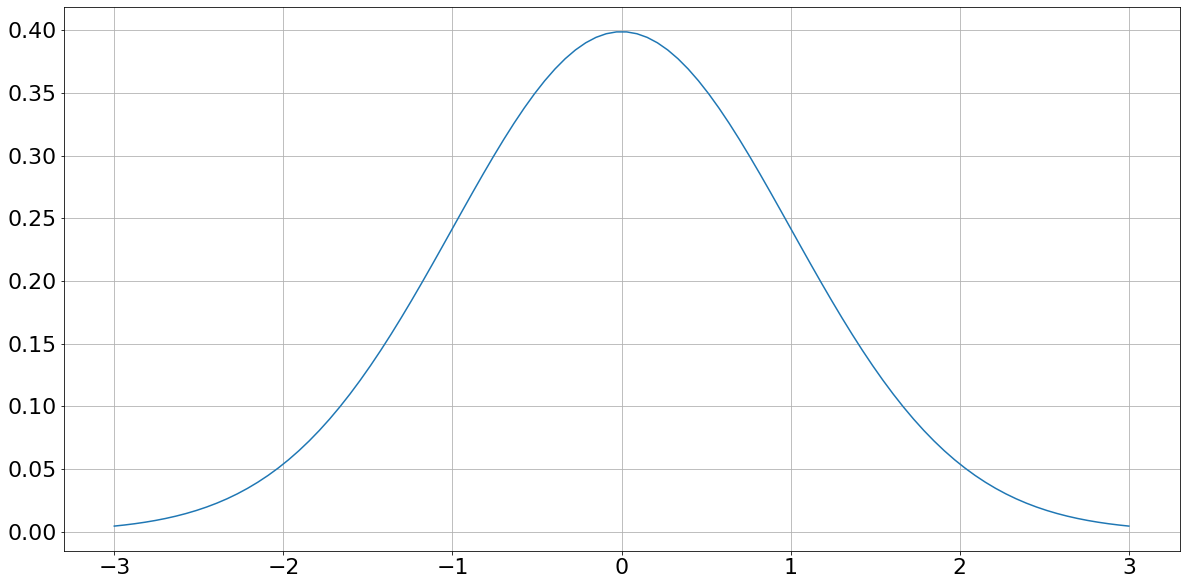

In [5]:
normal_dist()

In [6]:
interact(skewness, a=(-20,20,2))

interactive(children=(IntSlider(value=0, description='a', max=20, min=-20, step=2), Output()), _dom_classes=('…

<function __main__.skewness(a=0)>

## Miary rozkładu dla szeregu rozdzielczego

### Średnia i wariancja dla szeregu

$n_i$ - liczność $i$-tego przedziału

$\dot{x_i}$ - środek $i$-tego przedziału

\begin{itemize}
		\item Średnia:
			$$\bar{x_S} \approx \frac{\sum\limits_{i=1}^kn_i*\dot{x_i}}{n}$$
            
\item Wariancja:
			$$s^2_S \approx \frac{\sum\limits_{i=1}^kn_i*(\dot{x}-\bar{x})^2}{n-1}$$
\end{itemize}

### Dominanta - szereg rozdzielczy

$$x_{modS} \approx x_0 + \frac{n_0 - n_{-1}}{(n_0 - n_{-1})+(n_0 - n_{+1})}*h_0$$

![dominanta](https://www.cs.put.poznan.pl/amensfelt/pub/pics/dominanta.png)

### Mediana - szereg rozdzielczy

$$x_{medS} \approx x_0 + \frac{h_0}{n_0}*(\frac{n}{2}-F_{-1})$$

![mediana](https://www.cs.put.poznan.pl/amensfelt/pub/pics/mediana.png)

### Skośność

$$A=\frac{\bar{x}-D}{s}$$